In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import gridspec
import numpy as np

from binding.model.elements import Element
from figures.phase import PhaseDiagram, TitrationContours, OverallTitrationContours

%matplotlib inline

# Figure S1

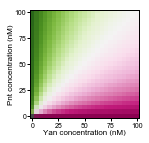

In [7]:
# element=None defaults to simple binding model
fig = PhaseDiagram(element=None)
fig.render()

# Model sensitivity analysis

In [6]:
# define binding energies (energies in kcal/mole, ordered [Yan, Pnt])
a0, b0, c0 = -9.955, -5.837, -7.043
scaling = 1

alpha = [a0, .96*(a0+c0)*scaling] 
beta = [b0, .96*(b0+c0)*scaling] 
gamma = [c0, 0]
binding_energies = dict(alpha=alpha, beta=beta, gamma=gamma)

# Varying density of ETS sites

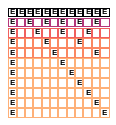

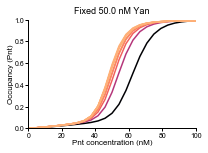

In [7]:
# define elements
Ns = 12
kwargs = dict(Ns=Ns, params=binding_energies)
elements = [Element(ets=list(range(0, Ns, n+1)), **kwargs) for n in range(Ns-1)]

# define contour colors
norm = Normalize(0, 1)
densities = [sum(e.ets)/e.Ns for e in elements]
colors = [plt.cm.magma_r(norm(d)) for d in densities]

# visualize elements
fig_grid = plt.figure(figsize=(2, 2))
gs = gridspec.GridSpec(nrows=len(elements), ncols=1, hspace=.2)
for i, element in enumerate(elements):
    ax = plt.subplot(gs[i])
    element.show(color=colors[i], ax=ax)

# plot titration contours
fig = OverallTitrationContours(*elements)
fig.render(cmax=100, colors=colors)

# Varying proximity of ETS sites

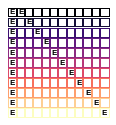

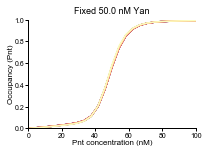

In [8]:
Ns = 12
kwargs = dict(Ns=Ns, params=binding_energies)
elements = [Element(ets=[0, n+1], **kwargs) for n in range(Ns-1)]

# define contour colors
norm = Normalize(1, 11)
proximities = [np.diff(np.where(e.ets.tolist())[0])[0] for e in elements]
colors = [plt.cm.magma(norm(p)) for p in proximities]

# visualize elements
fig_grid = plt.figure(figsize=(2, 2))
gs = gridspec.GridSpec(nrows=len(elements), ncols=1, hspace=.2)
for i, element in enumerate(elements):
    ax = plt.subplot(gs[i])
    element.show(color=colors[i], ax=ax)

# plot titration contours
fig = OverallTitrationContours(*elements)
fig.render(cmax=100, colors=colors)